In [1]:
# Setting seed for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
# Importing the dependencies
import os
import json
from zipfile import ZipFile

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [3]:
from PIL import Image

In [4]:
print(os.listdir("plantvillage dataset"))

['color', 'grayscale', 'segmented']


In [5]:
print(len(os.listdir("plantvillage dataset/segmented")))

38


In [6]:
print(os.listdir("plantvillage dataset/segmented")[:5])

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


In [7]:
print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


In [8]:
print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


No of classes is 38, So we know that this is a multiclass classification problem

In [9]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['00e00912-bf75-4cf8-8b7d-ad64b73bea5f___Mt.N.V_HL 6067.JPG', '0163a6aa-fbf8-47c5-965f-59b6efe8bfe5___Mt.N.V_HL 6103.JPG', '0294ca65-4c29-44be-af28-501df9f715e8___Mt.N.V_HL 6176.JPG', '02f95acb-5d92-4f2a-b7ec-3af8709ee7c9___Mt.N.V_HL 9078.JPG', '03027791-26bb-4c46-960e-8df76e27042c___Mt.N.V_HL 6070.JPG']


### Data Preprocessing

In [10]:
# Data Path 
base_dir = "plantvillage dataset/color"

In [11]:
from pathlib import Path
image_path = Path(r"D:\datascience\Course\Deep Learning\Project\Plant Disease Prediction with CNN\plantvillage dataset\color\Tomato___healthy\0caff918-5807-40f2-b9e4-7dd34a7bab5d___RS_HL 0345.JPG")

(256, 256, 3)


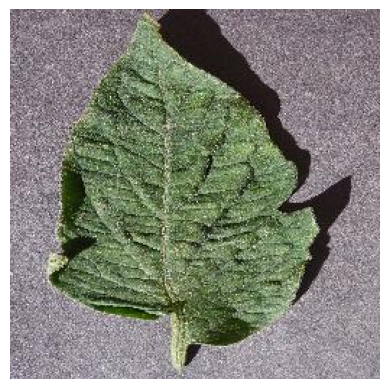

In [12]:
# Read the image
img = mping.imread(image_path)
print(img.shape)

# Display the image
plt.imshow(img)
plt.axis("off") # Turn off axis numbers
plt.show()

In [13]:
image_path = Path(r"D:\datascience\Course\Deep Learning\Project\Plant Disease Prediction with CNN\plantvillage dataset\color\Tomato___healthy\0caff918-5807-40f2-b9e4-7dd34a7bab5d___RS_HL 0345.JPG")

img = mping.imread(image_path)
print(img)

[[[140 128 138]
  [118 106 116]
  [135 123 133]
  ...
  [127 114 123]
  [ 80  67  76]
  [128 115 124]]

 [[160 148 158]
  [140 128 138]
  [ 86  74  84]
  ...
  [145 132 141]
  [ 94  81  90]
  [110  97 106]]

 [[126 114 124]
  [145 133 143]
  [127 115 125]
  ...
  [121 108 117]
  [119 106 115]
  [130 117 126]]

 ...

 [[160 154 166]
  [165 159 171]
  [160 154 166]
  ...
  [165 160 167]
  [171 166 173]
  [147 142 149]]

 [[137 131 143]
  [150 144 156]
  [151 145 157]
  ...
  [197 192 199]
  [169 164 171]
  [187 182 189]]

 [[ 95  89 101]
  [188 182 194]
  [183 177 189]
  ...
  [144 139 146]
  [155 150 157]
  [147 142 149]]]


In [14]:
# Image Parameter
img_size = 224
batch_size = 32

Train Test Split

In [15]:
# Image data generation
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 # Use 20% of data for validation
)

In [16]:
 # Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir, 
    target_size=(img_size, img_size), 
    batch_size=batch_size,
    subset="training",
    class_mode="categorical"
)

Found 43456 images belonging to 38 classes.


In [17]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir, 
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset="validation",
    class_mode="categorical"
)

Found 10849 images belonging to 38 classes.


In [18]:
train_generator.num_classes

38

CNN (Convolutional Neural Network)

In [19]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(train_generator.num_classes, activation="softmax"))

c:\Krishna Data\Old 2 Python\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

Model Training

In [22]:
# Training the model
history = model.fit(
    train_generator, 
    steps_per_epoch=train_generator.samples // batch_size, # Number of steps per epoch
    epochs = 5, # Number of Epoch
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size # Validation steps
)

Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 797s 586ms/step - accuracy: 0.7449 - loss: 0.9044 - val_accuracy: 0.8697 - val_loss: 0.4181
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 856s 631ms/step - accuracy: 0.9219 - loss: 0.2455 - val_accuracy: 0.8522 - val_loss: 0.4776
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 575s 423ms/step - accuracy: 0.9638 - loss: 0.1102 - val_accuracy: 0.8874 - val_loss: 0.4139
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 534s 394ms/step - accuracy: 0.9747 - loss: 0.0782 - val_accuracy: 0.8749 - val_loss: 0.5150
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 535s 394ms/step - accuracy: 0.9808 - loss: 0.0594 - val_accuracy: 0.8619 - val_loss: 0.5705


Model Evaluation

In [23]:
# Model Evaluation
print("Evaluating Model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating Model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 23s 69ms/step - accuracy: 0.8620 - loss: 0.5702
Validation Accuracy: 86.20%


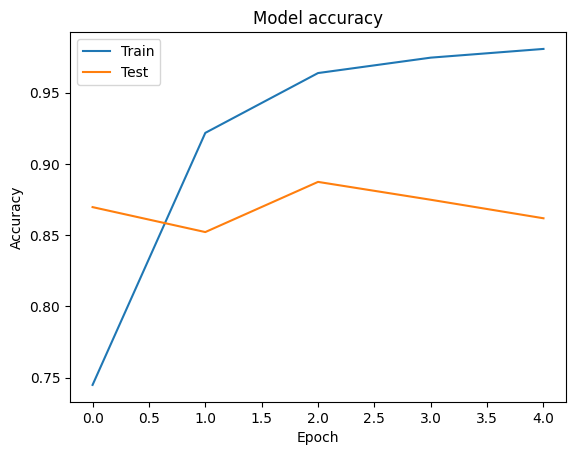

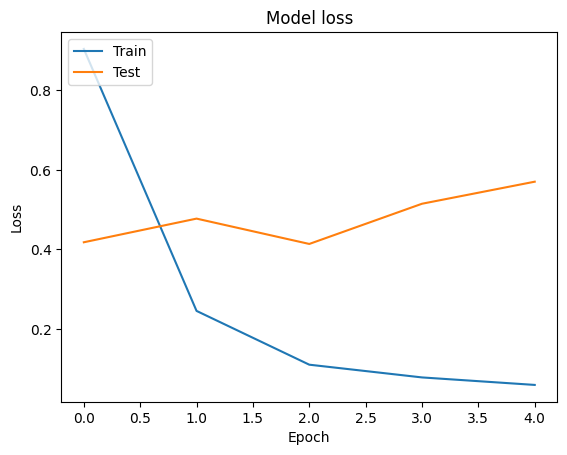

In [24]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Building a Predictive System

In [25]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [26]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [27]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [28]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [29]:
# Example Usage
image_path = Path(r'D:\datascience\Course\Deep Learning\Project\Plant Disease Prediction with CNN\0b2ed0b4-a6e1-4fb3-82dc-47f903f3d0a9___JR_HL 9603.JPG')
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted Class Name: Cherry_(including_sour)___healthy


(256, 256, 3)


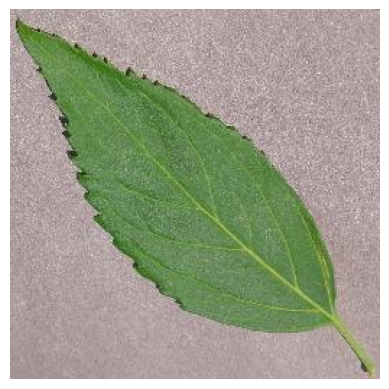

In [30]:
# Above image
img = mping.imread(image_path)
print(img.shape)

# Display the image
plt.imshow(img)
plt.axis("off") # Turn off axis numbers
plt.show()

In [31]:
model.save('plant_disease_prediction_model.h5')

In [33]:
class_names = list(train_generator.class_indices.keys())

In [34]:
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [35]:
import pickle
with open("class_names.pkl", "wb") as f:
    pickle.dump(class_names, f)